In [33]:
import pandas as pd
import matplotlib.pyplot as plt
pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [34]:
pumpkins.tail()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1738,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,15.00,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1739,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,13.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1740,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,10.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1741,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1742,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.


In [35]:
pumpkins.isnull().sum()


City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [36]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

In [37]:
pumpkins

,Package,Low Price,High Price,Date
70,1 1/9 bushel cartons,15.00,15.0,9/24/16
71,1 1/9 bushel cartons,18.00,18.0,9/24/16
72,1 1/9 bushel cartons,18.00,18.0,10/1/16
73,1 1/9 bushel cartons,17.00,17.0,10/1/16
74,1 1/9 bushel cartons,15.00,15.0,10/8/16
...,...,...,...,...
1738,1/2 bushel cartons,15.00,15.0,9/30/16
1739,1/2 bushel cartons,13.75,15.0,9/30/16
1740,1/2 bushel cartons,10.75,15.0,9/30/16
1741,1/2 bushel cartons,12.00,12.0,9/30/16


In [38]:
price = (pumpkins['Low Price'] + pumpkins['High Price'])/2

In [39]:
month = pd.DatetimeIndex(pumpkins['Date']).month
print(month)

Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=415)


In [42]:
print(pumpkins)
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low': pumpkins['Low Price'], 'High': pumpkins['High Price'], 'Average': price})
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

print(new_pumpkins)

                   Package  Low Price  High Price     Date
70    1 1/9 bushel cartons      15.00        15.0  9/24/16
71    1 1/9 bushel cartons      18.00        18.0  9/24/16
72    1 1/9 bushel cartons      18.00        18.0  10/1/16
73    1 1/9 bushel cartons      17.00        17.0  10/1/16
74    1 1/9 bushel cartons      15.00        15.0  10/8/16
...                    ...        ...         ...      ...
1738    1/2 bushel cartons      15.00        15.0  9/30/16
1739    1/2 bushel cartons      13.75        15.0  9/30/16
1740    1/2 bushel cartons      10.75        15.0  9/30/16
1741    1/2 bushel cartons      12.00        12.0  9/30/16
1742    1/2 bushel cartons      12.00        12.0  9/30/16

[415 rows x 4 columns]
      Month               Package    Low  High  Average  Price
70        9  1 1/9 bushel cartons  15.00  15.0   15.000  13.50
71        9  1 1/9 bushel cartons  18.00  18.0   18.000  16.20
72       10  1 1/9 bushel cartons  18.00  18.0   18.000  16.20
73       10  1 1

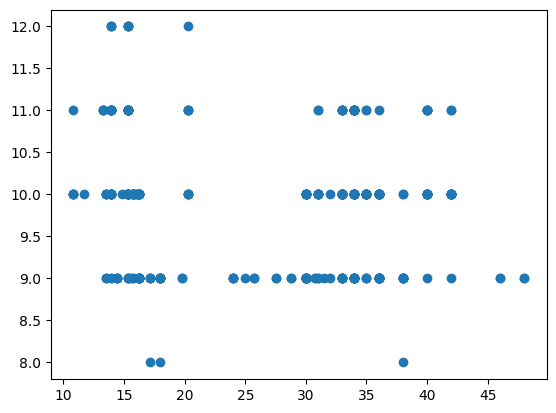

In [44]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()